In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
%matplotlib notebook
import time

from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
import networkx as nx
import sonnet as snt
import tensorflow as tf
import os

try:
    import seaborn as sns
except ImportError:
    pass
else:
    sns.reset_orig()

SEED = 1
np.random.seed(SEED)
tf.set_random_seed(SEED)

/home/vabence/anaconda3/envs/TensorEnv/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/vabence/anaconda3/envs/TensorEnv/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [85]:
data_X = np.load("1a1a1a1a_X_3_not_norm.npy")
data_y = np.load("1a1a1a1a_y_3_not_norm.npy")

print(data_X.shape)
print(data_y.shape)



def calc_positions(data_pusher, data_object):
    prev_pos_object = np.array([0.0,0.0,0.0])
    
    
    pos_object = np.zeros((data.shape[0],3))
    pos_pusher = np.zeros((data.shape[0],3))
    
    
    for i in range(data_pusher.shape[0]):
        pos_pusher[i] = prev_pos_object + data_pusher[i]
        pos_object[i] = prev_pos_object + data_object[i]
        prev_pos_object = pos_object[i]
        
    
    return pos_pusher,pos_object


def remove_non_contact_states(position_pusher,position_object):
    new_pos_object = -1
    new_pos_pusher = -1
    first = True
    
    prev_position_object = np.array([0.0,0.0,0.0]) 
    for i in range(position_object.shape[0]):
        difference = prev_position_object - position_object[i]
        if (np.linalg.norm(difference)>0.8):
            if(first):
                new_pos_object = [position_object[i]]
                new_pos_pusher = [position_pusher[i]]
                first=False
            else:
                new_pos_object = np.append(new_pos_object,[position_object[i]],axis=0)
                new_pos_pusher = np.append(new_pos_pusher,[position_pusher[i]],axis=0)
        else:
            print("Removed" + str(i))
    return new_pos_pusher, new_pos_object     




pos_X,pos_y = calc_positions(data_X,data_y)
#pos_X,pos_y = remove_non_contact_states(pos_X,pos_y)
plt.scatter(pos_X[:,0],pos_X[:,1])

plt.scatter(pos_y[:,0],pos_y[:,1])


(250, 3)
(250, 3)
Removed0
Removed1
Removed2
Removed3
Removed4
Removed5
Removed6
Removed16
Removed17
Removed18
Removed19
Removed20
Removed21
Removed22
Removed27
Removed28
Removed29
Removed30
Removed31
Removed32
Removed33
Removed34
Removed35
Removed36
Removed37
Removed38
Removed39
Removed40
Removed41
Removed42
Removed44
Removed45
Removed46
Removed47
Removed48
Removed49
Removed50
Removed51
Removed52
Removed61
Removed62
Removed63
Removed64
Removed65
Removed66
Removed89
Removed90
Removed91
Removed92
Removed93
Removed94
Removed95
Removed96
Removed97
Removed101
Removed102
Removed103
Removed104
Removed105
Removed106
Removed107


<IPython.core.display.Javascript object>


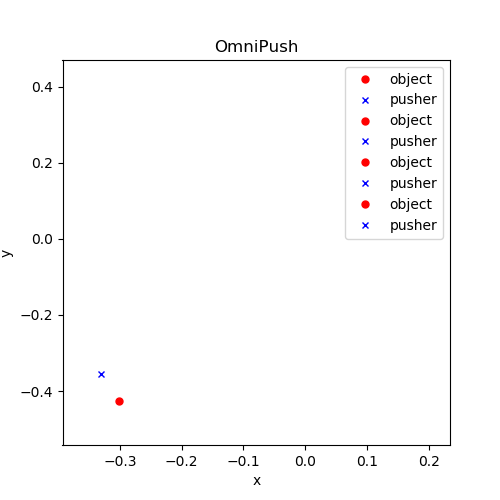

In [86]:
# Visualize trajectories
plt.close('all')
fig_animate3 = plt.figure(1, figsize=(5, 5))
ax3 = fig_animate3.add_subplot(1, 1, 1)

# Visualize trajectories
obj_pushed = []
pusher = []

    
def init():
    obj_pushed.append(ax3.plot([], [], linestyle='none', marker='o', markersize=5, color="r",label = "object"))
    pusher.append(ax3.plot([], [], linestyle='none', marker='x', markersize=5, color="b",label = "pusher"))
    
    return obj_pushed,pusher
    
#ax3.set_xlim(-10, 10)
#ax3.set_ylim(-10, 10)


def animate(z):
    obj_pushed[0][0].set_data(pos_y[z,0],pos_y[z,1])
    pusher[0][0].set_data(pos_X[z,0],pos_X[z,1])
    legend = ax3.legend()
    return obj_pushed,pusher,legend



anim = animation.FuncAnimation(fig_animate3, animate,init_func = init, interval = 0.5 * 1000, frames=pos_y.shape[0], blit=False, repeat=True)
ax3.set_title("OmniPush")
anim.save('omni_push.gif', writer='imagemagick', fps=50)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
plt.show()